In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import OPTICS
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_samples_total = 1000
cluster_centers = [(3, 3), (7, 7)]
num_classes = len(cluster_centers)
epsilon = 2.0
min_samples = 22
cluster_method = 'xi'
metric = 'minkowski'

In [3]:
X, y = make_blobs(n_samples=num_samples_total, centers=cluster_centers, n_features=2, cluster_std=0.5, random_state=42)

In [4]:
db = OPTICS(max_eps=epsilon, min_samples=min_samples, cluster_method=cluster_method, metric=metric).fit(X)

In [5]:
labels = db.labels_
no_clusters = len(np.unique(labels[labels != -1]))  # Exclude noise points
no_noise = np.sum(labels == -1)

In [6]:
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 2
Estimated no. of noise points: 461


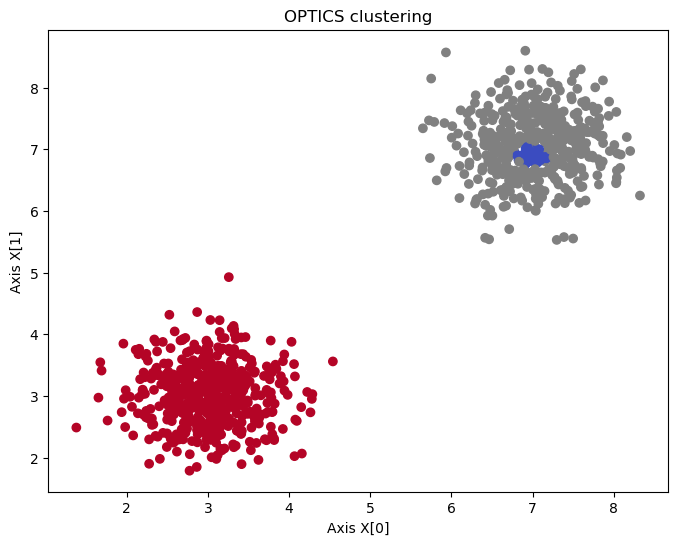

In [7]:
plt.figure(figsize=(8, 6))
colors = ['#3b4cc0' if label == 0 else '#b40426' if label == 1 else 'gray' for label in labels]
plt.scatter(X[:, 0], X[:, 1], c=colors, marker="o", picker=True)
plt.title('OPTICS clustering')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()


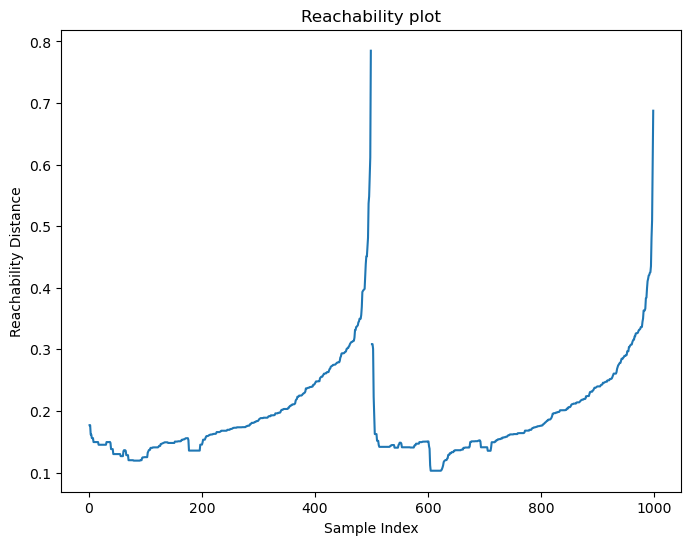

In [8]:
# Generate reachability plot
plt.figure(figsize=(8, 6))
reachability = db.reachability_[db.ordering_]
plt.plot(reachability)
plt.title('Reachability plot')
plt.xlabel('Sample Index')
plt.ylabel('Reachability Distance')
plt.show()